# Asteroid Classification

In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [47]:
import pandas as pd

# Load the dataset
df = pd.read_csv('nasa.csv')

# Display the first few rows of the dataset
df.head()


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True


In [48]:
# Check for null values in the dataset
null_values = df.isnull().sum()

# Display the null values
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis     

In [49]:
# Display data types of all columns
column_dtypes = df.dtypes

# Display the result
print("Data Types of Columns:")
print(column_dtypes)


Data Types of Columns:
Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach       float64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Int

In [50]:
# Drop the 'Equinox' column
df = df.drop('Equinox', axis=1)

# Display the first few rows of the updated DataFrame
df.head()


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,True


In [51]:
# Convert 'Hazardous' column values to integers (1 for True, 0 for False)
df['Hazardous'] = df['Hazardous'].astype(int)

# Display the first few rows of the updated DataFrame
df.head()


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,1


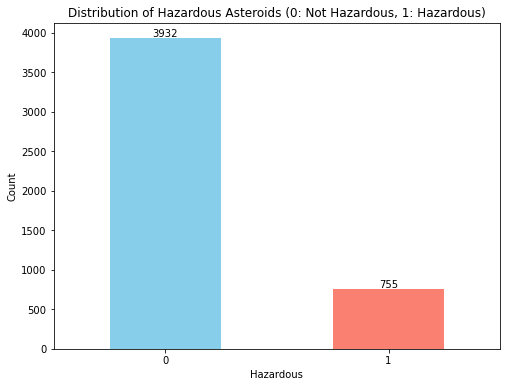

In [52]:
# Count the occurrences of 0s and 1s in the 'Hazardous' column
hazardous_counts = df['Hazardous'].value_counts()

# Plot a bar chart with counts on top of the bars
plt.figure(figsize=(8, 6))
ax = hazardous_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Hazardous Asteroids (0: Not Hazardous, 1: Hazardous)')
plt.xlabel('Hazardous')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add counts on top of the bars
for i, count in enumerate(hazardous_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()


In [53]:
# Display data types of all columns
column_dtypes = df.dtypes

# Display the result
print("Data Types of Columns:")
print(column_dtypes)


Data Types of Columns:
Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach       float64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Int

In [54]:
# Display the number of unique values in each object-type variable
object_columns = df.select_dtypes(include='object').columns

for column in object_columns:
    unique_values = df[column].nunique()
    print(f"Number of unique values in '{column}': {unique_values}")


Number of unique values in 'Close Approach Date': 777
Number of unique values in 'Orbiting Body': 1
Number of unique values in 'Orbit Determination Date': 457


In [55]:
# Drop the 'Orbiting Body' column
df = df.drop('Orbiting Body', axis=1)

# Display the first few rows of the updated DataFrame
df.head()


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,1


In [56]:
# Display data types of all columns
column_dtypes = df.dtypes

# Display the result
print("Data Types of Columns:")
print(column_dtypes)


Data Types of Columns:
Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach       float64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64
Jupiter Tisserand

In [57]:
# Convert 'Close Approach Date' and 'Orbit Determination Date' to datetime
df['Close Approach Date'] = pd.to_datetime(df['Close Approach Date'])
df['Orbit Determination Date'] = pd.to_datetime(df['Orbit Determination Date'])

# Extract relevant date features
df['Close Approach Year'] = df['Close Approach Date'].dt.year
df['Close Approach Month'] = df['Close Approach Date'].dt.month
df['Close Approach Day'] = df['Close Approach Date'].dt.day

df['Orbit Determination Year'] = df['Orbit Determination Date'].dt.year
df['Orbit Determination Month'] = df['Orbit Determination Date'].dt.month
df['Orbit Determination Day'] = df['Orbit Determination Date'].dt.day

# Drop the original date columns
df = df.drop(['Close Approach Date', 'Orbit Determination Date'], axis=1)

# Display the first few rows of the updated DataFrame
df.head()


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous,Close Approach Year,Close Approach Month,Close Approach Day,Orbit Determination Year,Orbit Determination Month,Orbit Determination Day
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,2458161.642,264.837533,0.590551,1,1995,1,1,2017,4,6
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,2457794.969,173.741112,0.845330,0,1995,1,1,2017,4,6
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,2458120.468,292.893654,0.559371,1,1995,1,8,2017,4,6
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,2457902.337,68.741007,0.700277,0,1995,1,15,2017,4,6
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,2457814.455,135.142133,0.726395,1,1995,1,15,2017,4,6


In [58]:
# Display data types of all columns
column_dtypes = df.dtypes

# Display the result
print("Data Types of Columns:")
print(column_dtypes)


Data Types of Columns:
Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Epoch Date Close Approach       float64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbit ID                          int64
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64
Jupiter Tisserand Invariant     float64
Epoch Osculation                float64
Eccentricity     

## Random Forest

AUC Score: 0.9952


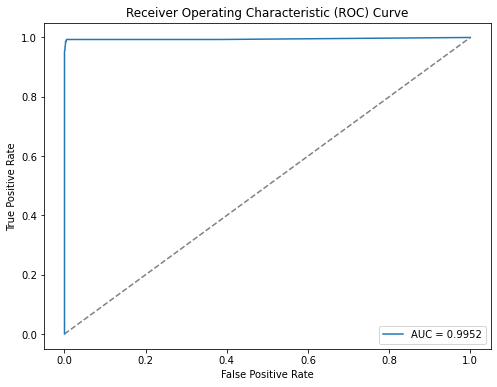


Accuracy: 0.9957

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       0.99      0.99      0.99       147

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938


Confusion Matrix:
[[789   2]
 [  2 145]]


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset (assuming the DataFrame is named 'df')
# Ensure that you have already run the previous code to process and clean the data
# If you haven't loaded the dataset, you can load it using pd.read_csv('your_dataset_file.csv')
# df = pd.read_csv('your_dataset_file.csv')

# Separate features (X) and target variable ('Hazardous')
X = df.drop('Hazardous', axis=1)
y = df['Hazardous']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set (probabilities)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Display the AUC score
print(f"AUC Score: {auc_score:.4f}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Make predictions on the testing set (class labels)
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Display the results
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report_output)
print("\nConfusion Matrix:")
print(confusion_mat)


In [60]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # You can adjust the number of folds (cv) as needed

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.99573561 0.99466951 0.99786553 0.99573106 0.99893276]
Mean CV Score: 0.996586893251383


The cross-validation scores are consistent with the testing data performance, and the mean cross-validation score is also high (close to 1). This indicates that the model is performing consistently well across different folds of the data, suggesting good generalization.

Given the high performance on both the testing data and cross-validation, it suggests that the model is not overfitting. It's important to note that the dataset characteristics and the nature of the classification task could contribute to the model's success.

If you have any specific aspects you'd like to explore further or if you have additional questions, feel free to let me know!

## Logistic regression

AUC Score (Logistic Regression): 0.4855


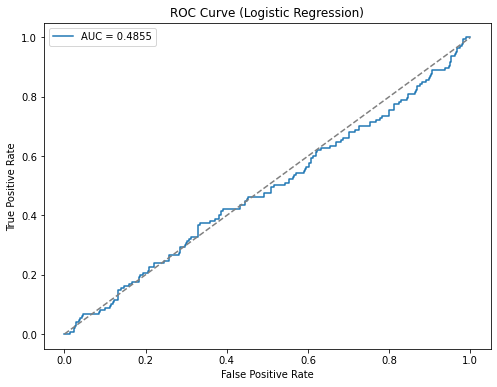


Accuracy (Logistic Regression): 0.8433

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       791
           1       0.00      0.00      0.00       147

    accuracy                           0.84       938
   macro avg       0.42      0.50      0.46       938
weighted avg       0.71      0.84      0.77       938


Confusion Matrix (Logistic Regression):
[[791   0]
 [147   0]]


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize and train a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the testing set (probabilities)
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score_logreg = roc_auc_score(y_test, y_prob_logreg)

# Display the AUC score
print(f"AUC Score (Logistic Regression): {auc_score_logreg:.4f}")

# Plot the ROC curve for Logistic Regression
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'AUC = {auc_score_logreg:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve (Logistic Regression)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Make predictions on the testing set (class labels)
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test, y_pred_logreg)
confusion_mat_logreg = confusion_matrix(y_test, y_pred_logreg)

# Display the results
print(f"\nAccuracy (Logistic Regression): {accuracy_logreg:.4f}")
print("\nClassification Report (Logistic Regression):")
print(classification_report_logreg)
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_mat_logreg)


## XGBoost

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:30:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC Score (XGBoost): 0.9998


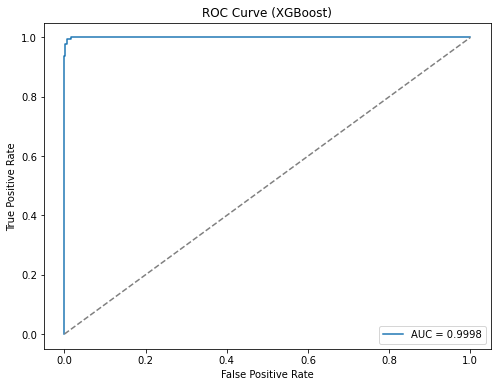


Accuracy (XGBoost): 0.9936

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       791
           1       0.97      0.99      0.98       147

    accuracy                           0.99       938
   macro avg       0.99      0.99      0.99       938
weighted avg       0.99      0.99      0.99       938


Confusion Matrix (XGBoost):
[[787   4]
 [  2 145]]


In [62]:
from xgboost import XGBClassifier

# Initialize and train an XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the testing set (probabilities)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score_xgb = roc_auc_score(y_test, y_prob_xgb)

# Display the AUC score for XGBoost
print(f"AUC Score (XGBoost): {auc_score_xgb:.4f}")

# Plot the ROC curve for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'AUC = {auc_score_xgb:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve (XGBoost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Make predictions on the testing set (class labels)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display the results for XGBoost
print(f"\nAccuracy (XGBoost): {accuracy_xgb:.4f}")
print("\nClassification Report (XGBoost):")
print(classification_report_xgb)
print("\nConfusion Matrix (XGBoost):")
print(confusion_mat_xgb)


## SVM

AUC Score (SVM): 0.4649


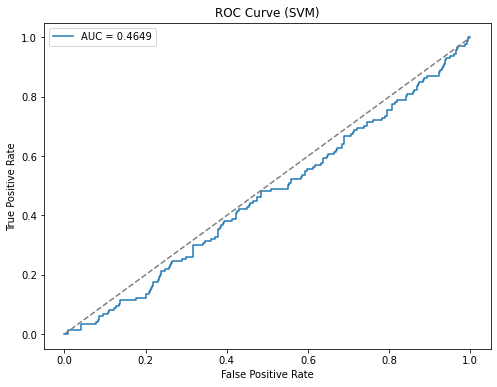


Accuracy (SVM): 0.8433

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       791
           1       0.00      0.00      0.00       147

    accuracy                           0.84       938
   macro avg       0.42      0.50      0.46       938
weighted avg       0.71      0.84      0.77       938


Confusion Matrix (SVM):
[[791   0]
 [147   0]]


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.svm import SVC

# Initialize and train an SVM model
svm_model = SVC(random_state=42, probability=True)  # Note: probability=True for calculating AUC
svm_model.fit(X_train, y_train)

# Make predictions on the testing set (probabilities)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score_svm = roc_auc_score(y_test, y_prob_svm)

# Display the AUC score for SVM
print(f"AUC Score (SVM): {auc_score_svm:.4f}")

# Plot the ROC curve for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'AUC = {auc_score_svm:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve (SVM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Make predictions on the testing set (class labels)
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)
confusion_mat_svm = confusion_matrix(y_test, y_pred_svm)

# Display the results for SVM
print(f"\nAccuracy (SVM): {accuracy_svm:.4f}")
print("\nClassification Report (SVM):")
print(classification_report_svm)
print("\nConfusion Matrix (SVM):")
print(confusion_mat_svm)


## Naive Bias

AUC Score (Naive Bayes): 0.5018


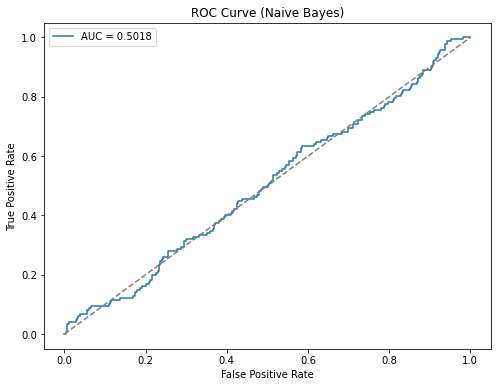


Accuracy (Naive Bayes): 0.8433

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       791
           1       0.00      0.00      0.00       147

    accuracy                           0.84       938
   macro avg       0.42      0.50      0.46       938
weighted avg       0.71      0.84      0.77       938


Confusion Matrix (Naive Bayes):
[[791   0]
 [147   0]]


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train a Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the testing set (probabilities)
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score_nb = roc_auc_score(y_test, y_prob_nb)

# Display the AUC score for Naive Bayes
print(f"AUC Score (Naive Bayes): {auc_score_nb:.4f}")

# Plot the ROC curve for Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'AUC = {auc_score_nb:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve (Naive Bayes)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Make predictions on the testing set (class labels)
y_pred_nb = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)
confusion_mat_nb = confusion_matrix(y_test, y_pred_nb)

# Display the results for Naive Bayes
print(f"\nAccuracy (Naive Bayes): {accuracy_nb:.4f}")
print("\nClassification Report (Naive Bayes):")
print(classification_report_nb)
print("\nConfusion Matrix (Naive Bayes):")
print(confusion_mat_nb)


## Decision Tree Classifier

AUC Score (Decision Tree): 0.9947


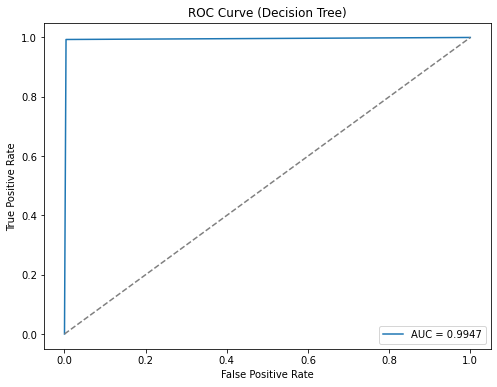


Accuracy (Decision Tree): 0.9957

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       0.98      0.99      0.99       147

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938


Confusion Matrix (Decision Tree):
[[788   3]
 [  1 146]]


In [39]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the testing set (probabilities)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score_dt = roc_auc_score(y_test, y_prob_dt)

# Display the AUC score for Decision Tree
print(f"AUC Score (Decision Tree): {auc_score_dt:.4f}")

# Plot the ROC curve for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'AUC = {auc_score_dt:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve (Decision Tree)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Make predictions on the testing set (class labels)
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)
confusion_mat_dt = confusion_matrix(y_test, y_pred_dt)

# Display the results for Decision Tree
print(f"\nAccuracy (Decision Tree): {accuracy_dt:.4f}")
print("\nClassification Report (Decision Tree):")
print(classification_report_dt)
print("\nConfusion Matrix (Decision Tree):")
print(confusion_mat_dt)


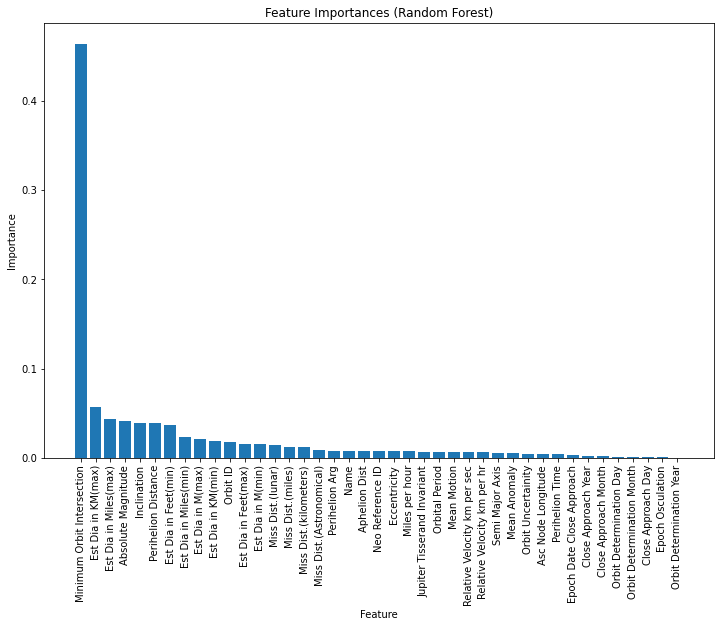

In [64]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Initialize and train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


### The model is giving exceptionally good result on decision tree based classifiers and below average results on the rest. So I am doubtful that the model is overfitting even if the we have good scores on test data as well as cross validation

In [65]:
# This is top 10 features from model with all the columns as predictors
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Initialize and train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print the top 10 features
top_10_features = [(feature_names[i], feature_importances[i]) for i in indices[:10]]
print("Top 10 Features and their Importances:")
for feature, importance in top_10_features:
    print(f"{feature}: {importance:.4f}")


Top 10 Features and their Importances:
Minimum Orbit Intersection: 0.4639
Est Dia in KM(max): 0.0574
Est Dia in Miles(max): 0.0434
Absolute Magnitude: 0.0413
Inclination: 0.0396
Perihelion Distance: 0.0387
Est Dia in Feet(min): 0.0365
Est Dia in Miles(min): 0.0232
Est Dia in M(max): 0.0210
Est Dia in KM(min): 0.0188


### Till now I used all the columns as predictor variables. Now lets do some feature selection.

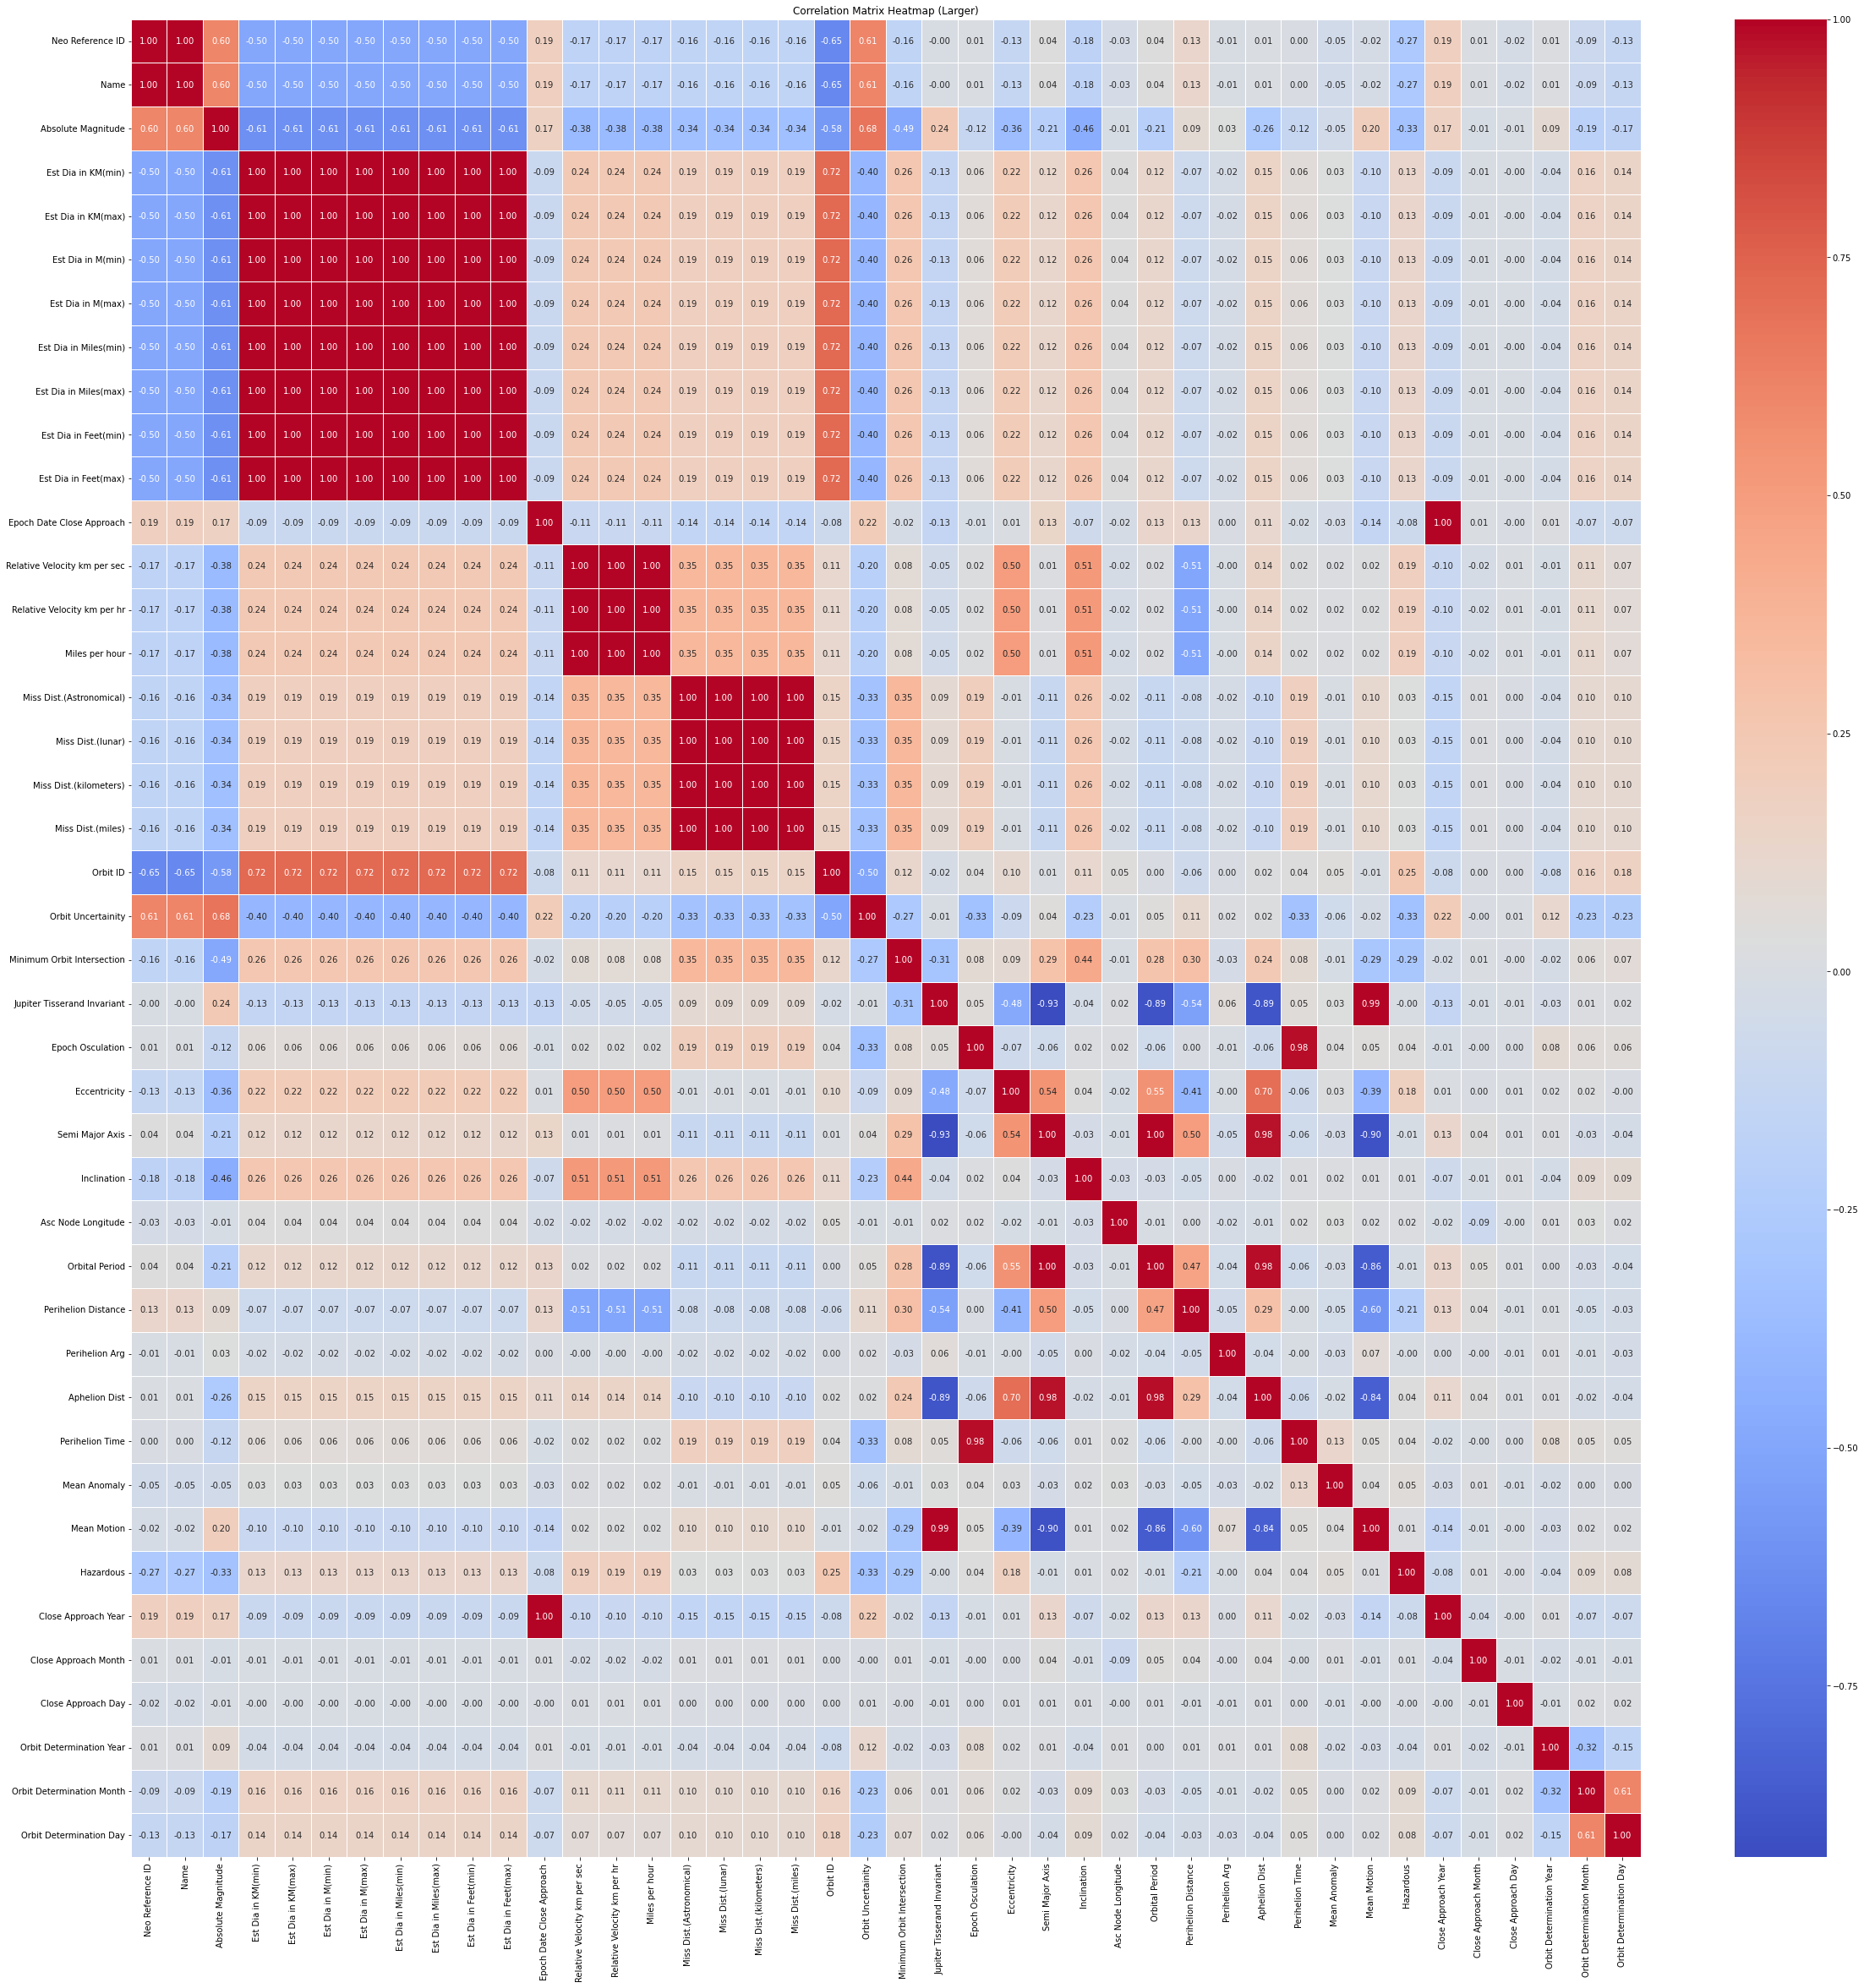

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your correlation matrix is named 'correlation_matrix'
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap (Larger)")
plt.show()


In [79]:
# List of columns to exclude because of heavy correlation and some meaning the same thing in different units.
exclude_columns = [
    'Name', 'Neo Reference ID', 'Est Dia in KM(min)', 'Est Dia in M(min)',
    'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
    'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Relative Velocity km per sec',
    'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
    'Miss Dist.(miles)', 'Close Approach Year', 'Mean Motion', 'Aphelion Dist'
]

# Create a new DataFrame with selected columns
df_feature_selection = df.drop(exclude_columns, axis=1)

# Display the new DataFrame
df_feature_selection.head()


,Absolute Magnitude,Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,...,Perihelion Distance,Perihelion Arg,Perihelion Time,Mean Anomaly,Hazardous,Close Approach Month,Close Approach Day,Orbit Determination Year,Orbit Determination Month,Orbit Determination Day
0,21.6,0.284472,7.890000e+11,22017.00380,62753692.0,17,5,0.025282,4.634,2458000.5,...,0.808259,57.257470,2458161.642,264.837533,1,1,1,2017,4,6
1,21.3,0.326618,7.890000e+11,65210.34609,57298148.0,21,3,0.186935,5.457,2458000.5,...,0.718200,313.091975,2457794.969,173.741112,0,1,1,2017,4,6
2,20.3,0.517654,7.900000e+11,27326.56018,7622911.5,22,0,0.043058,4.557,2458000.5,...,0.950791,248.415038,2458120.468,292.893654,1,1,8,2017,4,6
3,27.4,0.019681,7.900000e+11,40225.94819,42683616.0,7,6,0.005512,5.093,2458000.5,...,0.983902,18.707701,2457902.337,68.741007,0,1,15,2017,4,6
4,21.6,0.284472,7.900000e+11,35426.99179,61010824.0,25,1,0.034798,5.154,2458000.5,...,0.967687,158.263596,2457814.455,135.142133,1,1,15,2017,4,6


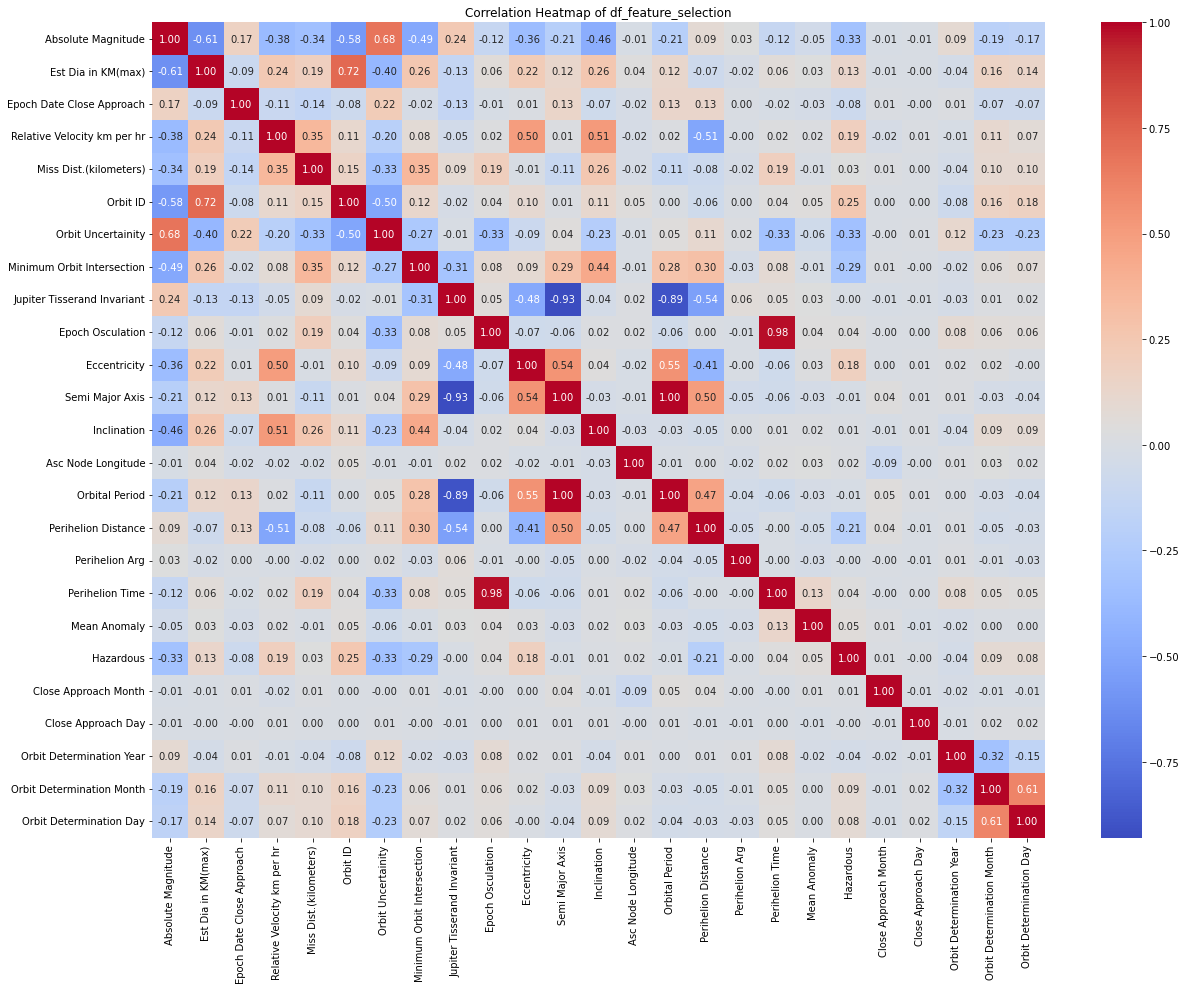

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_feature_selection.corr()

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of df_feature_selection")
plt.show()


In [92]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = df_feature_selection.drop('Hazardous', axis=1)  # Assuming 'Hazardous' is the target variable
y = df_feature_selection['Hazardous']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - Features: ", X_train.shape, " Labels: ", y_train.shape)
print("Testing set - Features: ", X_test.shape, " Labels: ", y_test.shape)


Training set - Features:  (3749, 24)  Labels:  (3749,)
Testing set - Features:  (938, 24)  Labels:  (938,)


In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("AUC Score: {:.4f}".format(auc_score))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 99.57%
AUC Score: 0.9979

Confusion Matrix:
 [[789   2]
 [  2 145]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       0.99      0.99      0.99       147

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938



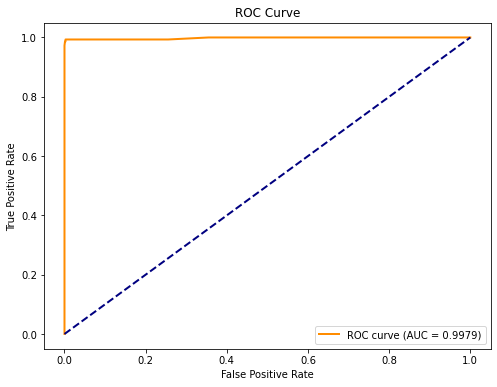

Accuracy: 99.57%
AUC Score: 0.9979

Confusion Matrix:
 [[789   2]
 [  2 145]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       0.99      0.99      0.99       147

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938



In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

# Get the ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.4f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("AUC Score: {:.4f}".format(auc_score))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


                        Feature  Importance
7    Minimum Orbit Intersection    0.417408
0            Absolute Magnitude    0.131001
1            Est Dia in KM(max)    0.118229
5                      Orbit ID    0.060020
15          Perihelion Distance    0.040045
6            Orbit Uncertainity    0.037293
12                  Inclination    0.037163
4        Miss Dist.(kilometers)    0.026303
10                 Eccentricity    0.018157
3   Relative Velocity km per hr    0.017918
8   Jupiter Tisserand Invariant    0.012886
16               Perihelion Arg    0.012606
14               Orbital Period    0.011269
11              Semi Major Axis    0.010989
18                 Mean Anomaly    0.009227
17              Perihelion Time    0.008868
13           Asc Node Longitude    0.008749
2     Epoch Date Close Approach    0.007521
19         Close Approach Month    0.004306
23      Orbit Determination Day    0.004035
22    Orbit Determination Month    0.002350
20           Close Approach Day 

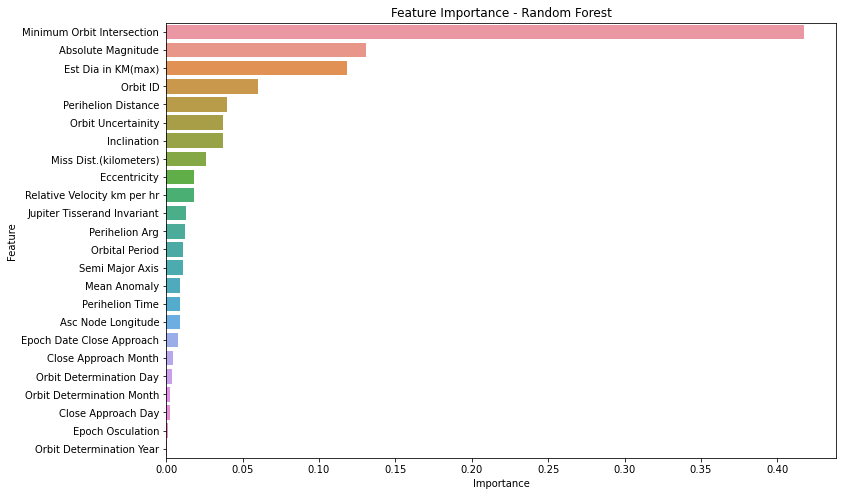

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assuming rf_classifier is your trained RandomForestClassifier

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
df_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(df_feature_importance)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=df_feature_importance)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='roc_auc')

# Print the AUC scores for each fold
print("Cross-Validation AUC Scores:", cv_scores)

# Print the mean AUC score
print("Mean AUC Score:", cv_scores.mean())


Cross-Validation AUC Scores: [0.9962722  0.99978963 0.99999157 0.99926697 1.        ]
Mean AUC Score: 0.999064076071783


## Guys even though the model is performing so good in the test data as well as cross validation, I am skeptical if the model is overfitting. Lets meet on gmeet and discuss it.
